# FIFA 2018 Team Performance Analysis: 
# Hierarchical Clustering and Strategic Recommendations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"FIFA 2018 Statistics.csv")
df

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,...,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,...,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,...,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,...,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [5]:
df = df[['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
          'Off-Target', 'Blocked', 'Corners', 'Offsides', 
          'Free Kicks', 'Saves', 'Pass Accuracy %', 
          'Passes', 'Distance Covered (Kms)', 'Fouls Committed']]
df.dropna(inplace=True)
df

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Goal Scored             128 non-null    int64
 1   Ball Possession %       128 non-null    int64
 2   Attempts                128 non-null    int64
 3   On-Target               128 non-null    int64
 4   Off-Target              128 non-null    int64
 5   Blocked                 128 non-null    int64
 6   Corners                 128 non-null    int64
 7   Offsides                128 non-null    int64
 8   Free Kicks              128 non-null    int64
 9   Saves                   128 non-null    int64
 10  Pass Accuracy %         128 non-null    int64
 11  Passes                  128 non-null    int64
 12  Distance Covered (Kms)  128 non-null    int64
 13  Fouls Committed         128 non-null    int64
dtypes: int64(14)
memory usage: 14.1 KB


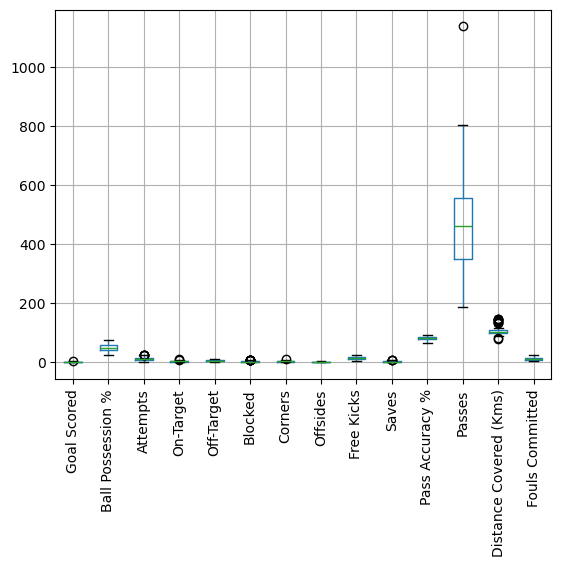

In [7]:
# Outliers
df.boxplot(column=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
                   'Off-Target', 'Blocked', 'Corners', 'Offsides', 
                   'Free Kicks', 'Saves', 'Pass Accuracy %', 
                   'Passes', 'Distance Covered (Kms)', 'Fouls Committed'])
plt.xticks(rotation=90)
plt.show()

In [8]:
# Winsorize
for i in df:                  # where, i = column name 
    if df[i].dtypes in ("float64","int64"): 
        q1 = df[i].quantile(0.25)  
        q3 = df[i].quantile(0.75)  
        iqr = q3-q1  
        ul = q3 + 1.5*iqr 
        ll = q1 - 1.5*iqr  
        df[i].clip(lower=ll,upper=ul,inplace=True)

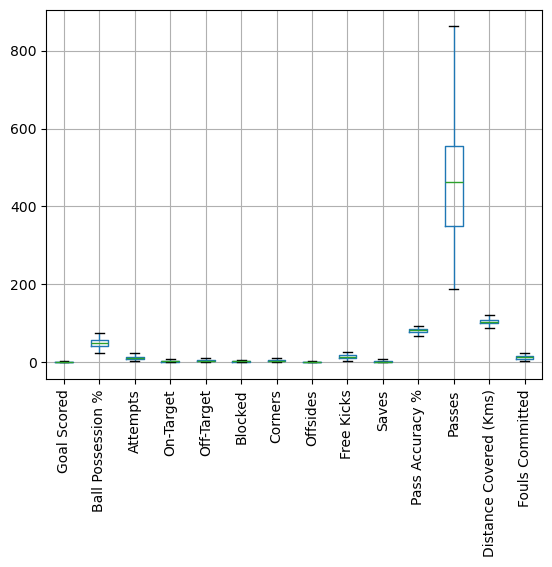

In [9]:
# Boxplot
df.boxplot(column=['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
                   'Off-Target', 'Blocked', 'Corners', 'Offsides', 
                   'Free Kicks', 'Saves', 'Pass Accuracy %', 
                   'Passes', 'Distance Covered (Kms)', 'Fouls Committed'])
plt.xticks(rotation=90)
plt.show()

In [10]:
# Columns for clustering
data = df[['Goal Scored', 'Ball Possession %']].values

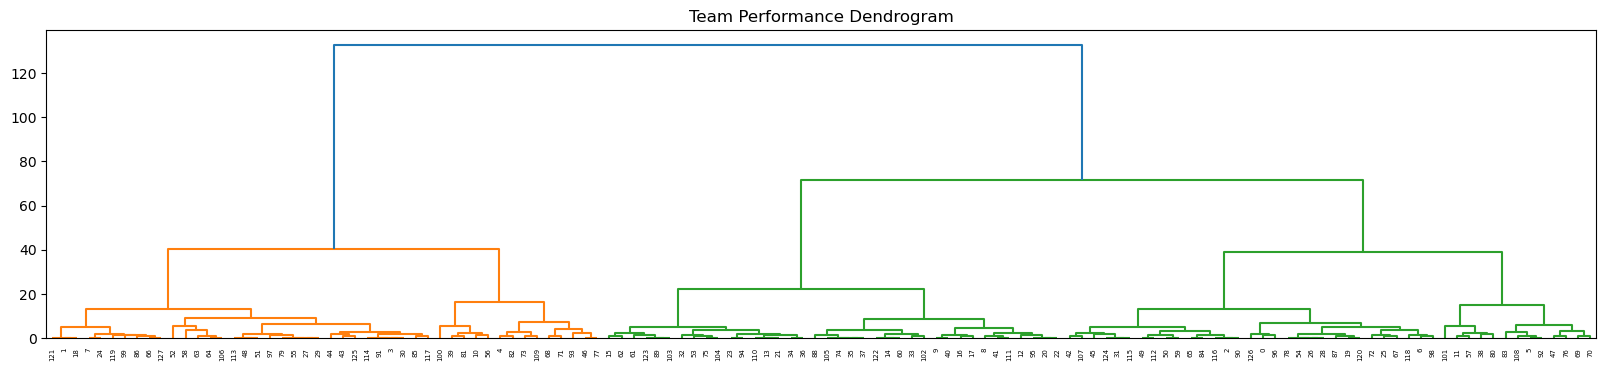

In [11]:
# Dendogram
plt.figure(figsize=(20, 4))
plt.title("Team Performance Dendrogram")
dend = shc.dendrogram(shc.linkage(data, method='ward', metric='euclidean'))
plt.show()

In [12]:
# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['Group'] = cluster.fit_predict(data)

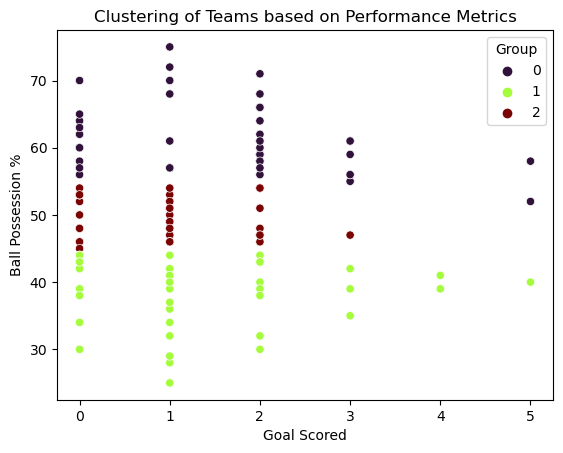

In [13]:
# Plotting Clusters
sns.scatterplot(x='Goal Scored', y='Ball Possession %', hue='Group', palette="turbo", data=df)
plt.title("Clustering of Teams based on Performance Metrics")
plt.show()

In [14]:
# Labels
df['Group'] = df['Group'].replace([0, 1, 2], ['Low', 'Medium', 'High'])

In [17]:
# Displaying only relevant columns and cluster labels
final_output = df[['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target', 
                   'Off-Target', 'Blocked', 'Corners', 'Offsides', 
                   'Free Kicks', 'Saves', 'Pass Accuracy %', 
                   'Passes', 'Distance Covered (Kms)', 'Fouls Committed', 'Group']]

# Display the final table
final_output.head()

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Group
0,5,40,13,7.0,3,3.0,6.0,3,11,0.0,78,306.0,118,22,Medium
1,0,60,6,0.0,3,3.0,2.0,1,25,2.0,86,511.0,105,10,Low
2,0,43,8,3.0,3,2.0,0.0,1,7,3.0,78,395.0,112,12,Medium
3,1,57,14,4.0,6,4.0,5.0,1,13,3.0,86,589.0,111,6,Low
4,0,64,13,3.0,6,4.0,5.0,0,14,2.0,86,433.0,101,22,Low


In [ ]:
# Defining conditions for suggestions
def condition(x):
    if x == 'Low':
        return "Focus on Defense Training"
    elif x == 'Medium':
        return "Balanced Strategy Required"
    else:
        return "Focus on Offensive Training"

In [19]:
# Generating suggestions based on clusters
def suggestion(group):
    if group == 'Low':
        return "Focus on improving both defense and offensive strategy."
    elif group == 'Medium':
        return "Strengthen core strategies with balanced improvements."
    else:
        return "Enhance team stamina and fine-tune goal conversion tactics."


# Apply
final_output['Suggestion'] = final_output['Group'].apply(suggestion)

final_output[['Goal Scored', 'Ball Possession %', 'Group', 'Suggestion']].head()

,Goal Scored,Ball Possession %,Group,Suggestion
0,5,40,Medium,Strengthen core strategies with balanced impro...
1,0,60,Low,Focus on improving both defense and offensive ...
2,0,43,Medium,Strengthen core strategies with balanced impro...
3,1,57,Low,Focus on improving both defense and offensive ...
4,0,64,Low,Focus on improving both defense and offensive ...


# Finished